In [1]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
results.head()
sns.set()
results = results[results.seed_size == 20]
print(results.columns)
results.head()

Index(['network_name', 'threshold', 'seed_size', 'budget_total', '0_no_block',
       '1_no_block', '2_no_block', '3_no_block', '0_cbh', '1_cbh', '2_cbh',
       '3_cbh', '0_degree', '1_degree', '2_degree', '3_degree',
       'total_no_block', 'total_cbh', 'total_degree'],
      dtype='object')


,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,2_cbh,3_cbh,0_degree,1_degree,2_degree,3_degree,total_no_block,total_cbh,total_degree
39,fb-pages-politician,2,20,29,889.0,0.0,0.0,5019.0,908.5,10.0,3.5,4986.0,1019.9,1.0,0.1,4887.0,4999.0,4979.5,4868.1
40,fb-pages-politician,2,20,59,889.0,0.0,0.0,5019.0,933.7,5.4,17.5,4951.4,1062.8,1.2,0.9,4843.1,4999.0,4954.3,4825.2
41,fb-pages-politician,2,20,118,889.0,0.0,0.0,5019.0,953.3,29.4,15.7,4909.6,1136.7,0.4,1.5,4769.4,4999.0,4934.7,4751.3
42,fb-pages-politician,2,20,177,889.0,0.0,0.0,5019.0,1042.0,25.8,1463.9,3376.3,1197.4,1.8,2.3,4706.5,4999.0,4846.0,4690.6
43,fb-pages-politician,2,20,236,889.0,0.0,0.0,5019.0,1540.9,4.7,1475.6,2886.8,1236.4,1.3,2.5,4667.8,4999.0,4347.1,4651.6


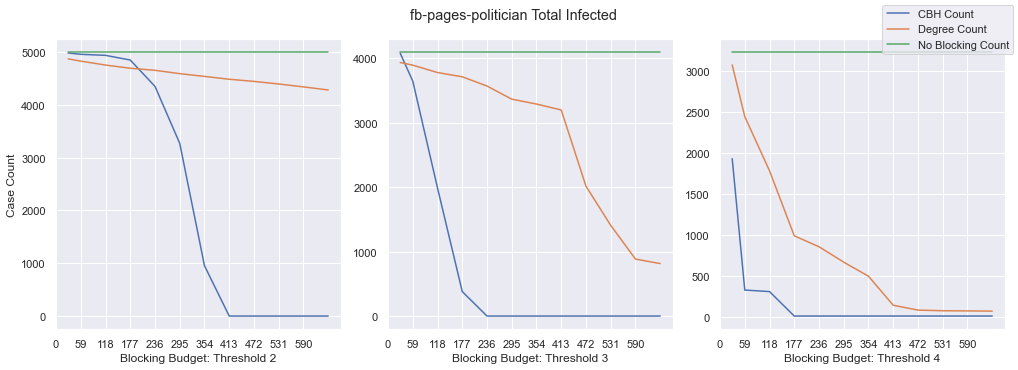

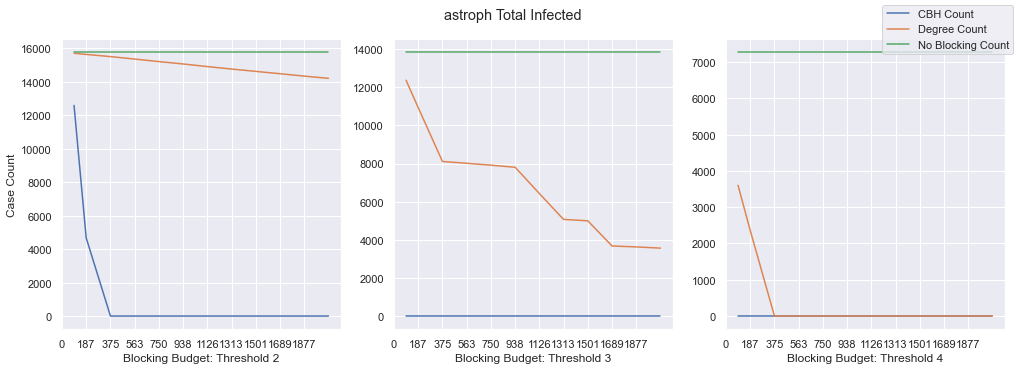

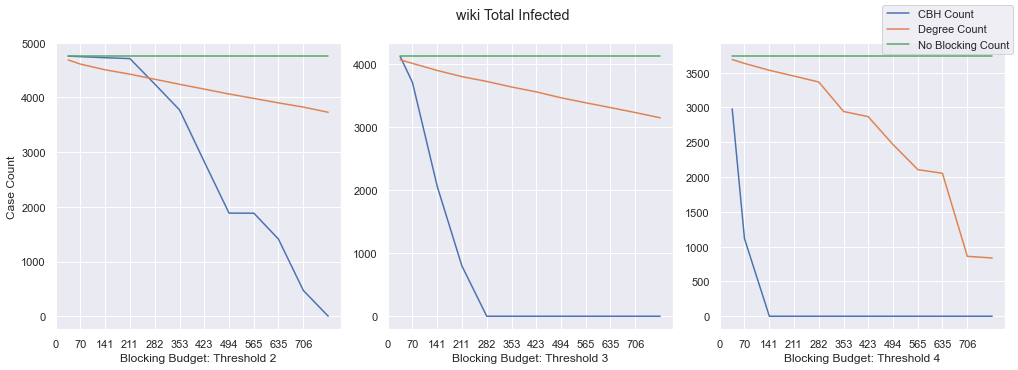

In [13]:
import matplotlib.pyplot as plt
import numpy as np
names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
#        threshold = threshold[threshold.seed_size == 10]
    my_range = np.arange(0, int(threshold.total_no_block.max()), int(threshold.total_no_block.max()) // 5)
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks([0] + list(subdf.budget_total)[:-2][1:])
#         ax[i].set_yticks(my_range)
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"])
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget: Threshold " + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf")

In [3]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh', 'budget_total' ]]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh,budget_total
117,15792.0,2,15713.7,12593.8,93
118,15792.0,2,15644.9,4677.0,187
119,15792.0,2,15514.6,0.0,375
120,15792.0,2,15367.1,0.0,563
121,15792.0,2,15215.7,0.0,750
122,15792.0,2,15073.8,0.0,938
123,15792.0,2,14917.6,0.0,1126
124,15792.0,2,14770.9,0.0,1313
125,15792.0,2,14630.0,0.0,1501
126,15792.0,2,14491.0,0.0,1689
